In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from keras.callbacks import History 
history = History()

In [3]:
data = pd.read_csv ('AABA_2006-01-01_to_2018-01-01.csv', date_parser= True)
data.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
3018,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


In [4]:
data_training = data[data['Date'] < '2017-01-01'].copy()
data_testing = data[data['Date'] >= '2017-01-01'].copy() 

training_data = data_training.drop(['Date','Low','Close','Open','Volume','Name'], axis = 1)

training_data.head()
data_testing.head()

,Date,Open,High,Low,Close,Volume,Name
2768,2017-01-03,39.11,39.18,38.64,38.90,6084699,AABA
2769,2017-01-04,39.00,40.25,38.92,40.06,11759453,AABA
2770,2017-01-05,40.31,41.37,40.24,41.34,13122100,AABA
2771,2017-01-06,41.25,41.34,40.85,41.23,6087644,AABA
2772,2017-01-09,41.17,41.66,41.12,41.34,7797445,AABA


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data.drop(['Date','Low','Close','Open','Volume','Name'], axis = 1).copy())
training_data = scaler.transform(training_data)
training_data

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(data.drop(['Date','Low','Close','Open','Volume','Name'], axis = 1).copy())




array([[0.4977262 ],
       [0.50838952],
       [0.50572369],
       ...,
       [0.46636349],
       [0.4618159 ],
       [0.4629136 ]])

In [6]:
training_data



array([[0.4977262 ],
       [0.50838952],
       [0.50572369],
       ...,
       [0.46636349],
       [0.4618159 ],
       [0.4629136 ]])

In [7]:
X_train = []
Y_train = []

In [8]:
training_data.shape[0]

2768

In [9]:
for i in range (60, training_data.shape[0]):
    X_train.append(training_data[i-60: i,0]) 
    Y_train.append(training_data[i,0])

print(X_train[0])
print(Y_train[0])

[0.4977262  0.50838952 0.50572369 0.53457739 0.53598871 0.53097068
 0.51481888 0.50980085 0.49553081 0.48471068 0.41837855 0.41336051
 0.39485652 0.39077936 0.40332445 0.40771523 0.40410851 0.40442214
 0.40379489 0.40332445 0.40018818 0.40175631 0.38529089 0.38372275
 0.3703936  0.37509801 0.37447075 0.36255292 0.36004391 0.36615964
 0.37400031 0.37509801 0.37102086 0.36992316 0.37415713 0.37917516
 0.37415713 0.37211855 0.36851184 0.35973028 0.35486906 0.35424181
 0.35220323 0.35628038 0.3460875  0.34248079 0.33903089 0.33699232
 0.33746276 0.34185354 0.33558099 0.32742669 0.33636506 0.33401286
 0.33605143 0.35236004 0.35800533 0.35439862 0.36098479 0.36741414]
0.3661596361925671


In [10]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [11]:
X_train.shape

(2708, 60)

In [12]:

Y_train.shape 

(2708,)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [14]:
regressor3 = Sequential()
regressor3.add(LSTM(units=15, activation= "tanh", return_sequences=False, input_shape = (X_train.shape[1] , 1)))
regressor3.add(Dense(units = 25))
regressor3.add(Dense(units = 1))
regressor3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15)                1020      
                                                                 
 dense (Dense)               (None, 25)                400       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,446
Trainable params: 1,446
Non-trainable params: 0
_________________________________________________________________


In [15]:
regressor2 = Sequential()
regressor2.add(LSTM(units=25, activation= "tanh", return_sequences=False, input_shape = (X_train.shape[1] , 1)))
regressor2.add(Dense(units = 25))
regressor2.add(Dense(units = 1))
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25)                2700      
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 3,376
Trainable params: 3,376
Non-trainable params: 0
_________________________________________________________________


In [16]:
regressor = Sequential()
regressor.add(LSTM(units=25, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 1)))
regressor.add(LSTM(units=25, activation= "tanh")) 
regressor.add(Dense(units = 25))
regressor.add(Dense(units = 1))


regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 25)            2700      
                                                                 
 lstm_3 (LSTM)               (None, 25)                5100      
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8,476
Trainable params: 8,476
Non-trainable params: 0
_________________________________________________________________


In [17]:
regressor5 = Sequential()
regressor5.add(LSTM(units=50, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 1)))
regressor5.add(LSTM(units=50, activation= "tanh")) 
regressor5.add(Dense(units = 25))
regressor5.add(Dense(units = 1))


regressor5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
regressor6 = Sequential()
regressor6.add(LSTM(units=50, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 1)))
regressor6.add(LSTM(units=50, activation= "tanh")) 
regressor6.add(Dense(units = 25))
regressor6.add(Dense(units = 1))


regressor6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [19]:
regressor4 = Sequential()
regressor4.add(LSTM(units=50, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 1)))
regressor4.add(LSTM(units=100, activation= "tanh")) 
regressor4.add(Dense(units = 25))
regressor4.add(Dense(units = 1))


regressor4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 100)               60400     
                                                                 
 dense_10 (Dense)            (None, 25)                2525      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 73,351
Trainable params: 73,351
Non-trainable params: 0
_________________________________________________________________


In [20]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error") 
regressor2.compile(optimizer= "adam", loss = "mean_squared_error") 

In [21]:
print('شروع معماری اول LSTM')
history = regressor.fit(X_train, Y_train, epochs=60, batch_size = 64)

شروع معماری اول LSTM
Epoch 1/60
43/43 [==============================] - 10s 19ms/step - loss: 0.0076
Epoch 2/60
43/43 [==============================] - 1s 14ms/step - loss: 5.6660e-04
Epoch 3/60
43/43 [==============================] - 1s 13ms/step - loss: 4.9419e-04
Epoch 4/60
43/43 [==============================] - 1s 13ms/step - loss: 4.5498e-04
Epoch 5/60
43/43 [==============================] - 0s 9ms/step - loss: 4.3381e-04
Epoch 6/60
43/43 [==============================] - 0s 8ms/step - loss: 4.1746e-04
Epoch 7/60
43/43 [==============================] - 0s 9ms/step - loss: 3.9678e-04
Epoch 8/60
43/43 [==============================] - 0s 9ms/step - loss: 3.7808e-04
Epoch 9/60
43/43 [==============================] - 0s 9ms/step - loss: 3.7058e-04
Epoch 10/60
43/43 [==============================] - 0s 9ms/step - loss: 3.3944e-04
Epoch 11/60
43/43 [==============================] - 0s 9ms/step - loss: 3.2589e-04
Epoch 12/60
43/43 [==============================] - 0s 9ms/ste

In [22]:
print('شروع معماری دوم LSTM')
history2 = regressor2.fit(X_train, Y_train, epochs=60, batch_size = 64)

شروع معماری دوم LSTM
Epoch 1/60
43/43 [==============================] - 2s 5ms/step - loss: 0.0195
Epoch 2/60
43/43 [==============================] - 0s 5ms/step - loss: 6.5345e-04
Epoch 3/60
43/43 [==============================] - 0s 6ms/step - loss: 3.0012e-04
Epoch 4/60
43/43 [==============================] - 0s 5ms/step - loss: 2.8972e-04
Epoch 5/60
43/43 [==============================] - 0s 5ms/step - loss: 2.8605e-04
Epoch 6/60
43/43 [==============================] - 0s 6ms/step - loss: 2.7628e-04
Epoch 7/60
43/43 [==============================] - 0s 6ms/step - loss: 2.6983e-04
Epoch 8/60
43/43 [==============================] - 0s 5ms/step - loss: 2.6477e-04
Epoch 9/60
43/43 [==============================] - 0s 6ms/step - loss: 2.6562e-04
Epoch 10/60
43/43 [==============================] - 0s 6ms/step - loss: 2.4871e-04
Epoch 11/60
43/43 [==============================] - 0s 6ms/step - loss: 2.3951e-04
Epoch 12/60
43/43 [==============================] - 0s 6ms/step - l

In [23]:
regressor3.compile(optimizer= "adam", loss = "mean_squared_error") 
history3 = regressor3.fit(X_train, Y_train, epochs=60, batch_size = 64)

Epoch 1/60
43/43 [==============================] - 2s 6ms/step - loss: 0.0281
Epoch 2/60
43/43 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 3/60
43/43 [==============================] - 0s 6ms/step - loss: 4.9661e-04
Epoch 4/60
43/43 [==============================] - 0s 6ms/step - loss: 4.6595e-04
Epoch 5/60
43/43 [==============================] - 0s 6ms/step - loss: 4.4013e-04
Epoch 6/60
43/43 [==============================] - 0s 6ms/step - loss: 4.3201e-04
Epoch 7/60
43/43 [==============================] - 0s 5ms/step - loss: 4.0602e-04
Epoch 8/60
43/43 [==============================] - 0s 6ms/step - loss: 3.8603e-04
Epoch 9/60
43/43 [==============================] - 0s 5ms/step - loss: 3.7497e-04
Epoch 10/60
43/43 [==============================] - 0s 6ms/step - loss: 3.6218e-04
Epoch 11/60
43/43 [==============================] - 0s 5ms/step - loss: 3.4621e-04
Epoch 12/60
43/43 [==============================] - 0s 5ms/step - loss: 3.3785e-04
Epoch 13/

In [24]:

regressor4.compile(optimizer= "adam", loss = "mean_squared_error") 
history4 = regressor4.fit(X_train, Y_train, epochs=60, batch_size = 128)

Epoch 1/60
22/22 [==============================] - 3s 14ms/step - loss: 0.0152
Epoch 2/60
22/22 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 3/60
22/22 [==============================] - 0s 11ms/step - loss: 4.7009e-04
Epoch 4/60
22/22 [==============================] - 0s 10ms/step - loss: 4.2290e-04
Epoch 5/60
22/22 [==============================] - 0s 11ms/step - loss: 3.9403e-04
Epoch 6/60
22/22 [==============================] - 0s 10ms/step - loss: 3.8536e-04
Epoch 7/60
22/22 [==============================] - 0s 11ms/step - loss: 3.7917e-04
Epoch 8/60
22/22 [==============================] - 0s 10ms/step - loss: 3.7204e-04
Epoch 9/60
22/22 [==============================] - 0s 10ms/step - loss: 3.5701e-04
Epoch 10/60
22/22 [==============================] - 0s 10ms/step - loss: 3.4672e-04
Epoch 11/60
22/22 [==============================] - 0s 10ms/step - loss: 3.4460e-04
Epoch 12/60
22/22 [==============================] - 0s 10ms/step - loss: 3.4977e-

In [75]:
regressor5.compile(optimizer= "adam", loss = "mean_squared_error") 
history5=regressor5.fit(X_train, Y_train, epochs=60, batch_size = 16)

Epoch 1/60
170/170 [==============================] - 5s 9ms/step - loss: 1.0690e-04
Epoch 2/60
170/170 [==============================] - 1s 9ms/step - loss: 1.0340e-04
Epoch 3/60
170/170 [==============================] - 1s 9ms/step - loss: 1.0388e-04
Epoch 4/60
170/170 [==============================] - 1s 9ms/step - loss: 9.2676e-05
Epoch 5/60
170/170 [==============================] - 2s 9ms/step - loss: 9.3761e-05
Epoch 6/60
170/170 [==============================] - 1s 9ms/step - loss: 9.5173e-05
Epoch 7/60
170/170 [==============================] - 1s 9ms/step - loss: 1.0297e-04
Epoch 8/60
170/170 [==============================] - 2s 9ms/step - loss: 1.0987e-04
Epoch 9/60
170/170 [==============================] - 1s 9ms/step - loss: 9.7356e-05
Epoch 10/60
170/170 [==============================] - 1s 9ms/step - loss: 9.2873e-05
Epoch 11/60
170/170 [==============================] - 1s 9ms/step - loss: 9.6604e-05
Epoch 12/60
170/170 [==============================] - 1s 9ms/s

In [26]:
regressor6.compile(optimizer= "adam", loss = "mean_squared_error") 
history6 = regressor6.fit(X_train, Y_train, epochs=60, batch_size = 64)

Epoch 1/60
43/43 [==============================] - 3s 10ms/step - loss: 0.0088
Epoch 2/60
43/43 [==============================] - 0s 8ms/step - loss: 4.4756e-04
Epoch 3/60
43/43 [==============================] - 0s 9ms/step - loss: 3.9917e-04
Epoch 4/60
43/43 [==============================] - 0s 9ms/step - loss: 3.8130e-04
Epoch 5/60
43/43 [==============================] - 0s 9ms/step - loss: 3.6604e-04
Epoch 6/60
43/43 [==============================] - 0s 9ms/step - loss: 3.5026e-04
Epoch 7/60
43/43 [==============================] - 0s 8ms/step - loss: 3.5817e-04
Epoch 8/60
43/43 [==============================] - 0s 9ms/step - loss: 3.2082e-04
Epoch 9/60
43/43 [==============================] - 0s 9ms/step - loss: 3.1187e-04
Epoch 10/60
43/43 [==============================] - 0s 8ms/step - loss: 3.1001e-04
Epoch 11/60
43/43 [==============================] - 0s 8ms/step - loss: 2.9914e-04
Epoch 12/60
43/43 [==============================] - 0s 8ms/step - loss: 2.8777e-04
Epoc

In [51]:
past_60_days = data_training.tail(60)

data_testing.shape

(251, 7)

In [52]:
df= past_60_days.append (data_testing, ignore_index= True)
df.shape

(311, 7)

In [53]:
df = df.drop (['Close','Name','Open','Date','Low','Volume'], axis =1)


In [54]:
df.head()

,High
0,43.82
1,43.68
2,44.07
3,44.08
4,42.78


In [55]:
inputs = scaler.transform(df)
# inputs


In [56]:
inputs

array([[0.53849773],
       [0.53630234],
       [0.54241806],
       [0.54257488],
       [0.52218912],
       [0.51121217],
       [0.513878  ],
       [0.50901678],
       [0.51936647],
       [0.52469813],
       [0.5207778 ],
       [0.51309393],
       [0.52062098],
       [0.52171868],
       [0.51685746],
       [0.51764152],
       [0.51340756],
       [0.51246668],
       [0.49960797],
       [0.51246668],
       [0.49035597],
       [0.48910146],
       [0.49788302],
       [0.49866708],
       [0.50039203],
       [0.50446919],
       [0.48674926],
       [0.48471068],
       [0.48565156],
       [0.49506037],
       [0.50446919],
       [0.50446919],
       [0.50180336],
       [0.50054885],
       [0.49396268],
       [0.49553081],
       [0.50525325],
       [0.50729183],
       [0.50478281],
       [0.49490356],
       [0.48361298],
       [0.48471068],
       [0.48518112],
       [0.48753332],
       [0.50368512],
       [0.50682139],
       [0.50258742],
       [0.506

In [57]:
X_test = []
y_test = []

for i in range (60, inputs.shape[0]):
  X_test.append (inputs[i-60:i,0])
  y_test.append (inputs[i,0])

In [58]:
X_test, y_test = np.array (X_test), np.array(y_test)
X_test.shape, y_test.shape


((251, 60), (251,))

In [59]:

y_pred = regressor.predict(X_test)
y_pred2 = regressor2.predict(X_test)

y_pred3 = regressor3.predict(X_test)

y_pred4 = regressor4.predict(X_test)

y_pred5 = regressor5.predict(X_test)

y_pred6 = regressor6.predict(X_test)

y_pred6.shape

# y_test.shape

8/8 [==============================] - 0s 5ms/step


(251, 1)

In [60]:
def msefunc(pred, test):
  print(pred.shape)
  pred=pred.reshape(y_pred.shape[0])
  errors = pred - test
  mse = np.square(errors).mean()
  print(mse)

print('LSTM معماری 1 لایه با یونیت های  کمتر')
msefunc(y_pred3,y_test)

print('LSTM معماری 1 لایه با یونیت های  بیشتر')
msefunc(y_pred2,y_test)

print('LSTM معماری 2 لایه')
msefunc(y_pred,y_test)

print('LSTM معماری 2 لایه با سایز دسته یا بچ سایز کمتر')
msefunc(y_pred5,y_test)

print('LSTM معماری 2 لایه با سایز دسته یا بچ سایز بیشتر')
msefunc(y_pred6,y_test)


LSTM معماری 1 لایه با یونیت های  کمتر
(251, 1)
0.00031277679480563425
LSTM معماری 1 لایه با یونیت های  بیشتر
(251, 1)
0.00016979542788538856
LSTM معماری 2 لایه
(251, 1)
0.00024795484649500966
LSTM معماری 2 لایه با سایز دسته یا بچ سایز کمتر
(251, 1)
0.0002893398785921067
LSTM معماری 2 لایه با سایز دسته یا بچ سایز بیشتر
(251, 1)
0.00013893970570961833


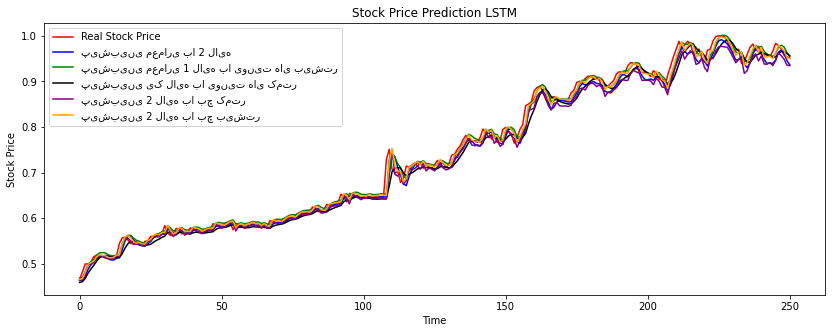

In [61]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred, color = 'blue', label = 'پیشبینی معماری با 2 لایه')
plt.plot(y_pred2, color = 'green', label = 'پیشبینی معماری 1 لایه با یونیت های بیشتر')
plt.plot(y_pred3, color = 'black', label = 'پیشبینی یک لایه با یونیت های کمتر')
plt.plot(y_pred5, color = 'purple', label = 'پیشبینی 2 لایه با بچ کمتر')
plt.plot(y_pred6, color = 'orange', label = 'پیشبینی 2 لایه با بچ بیشتر')
plt.title('Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

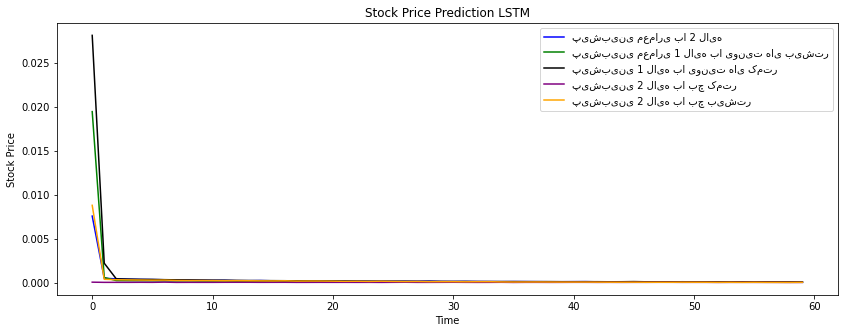

In [62]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'blue', label = 'پیشبینی معماری با 2 لایه')
plt.plot(history2.history['loss'], color = 'green', label = 'پیشبینی معماری 1 لایه با یونیت های بیشتر')
plt.plot(history3.history['loss'], color = 'black', label = 'پیشبینی 1 لایه با یونیت های کمتر')
plt.plot(history5.history['loss'], color = 'purple', label = 'پیشبینی 2 لایه با بچ کمتر')
plt.plot(history6.history['loss'], color = 'orange', label = 'پیشبینی 2 لایه با بچ بیشتر')
plt.title('Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

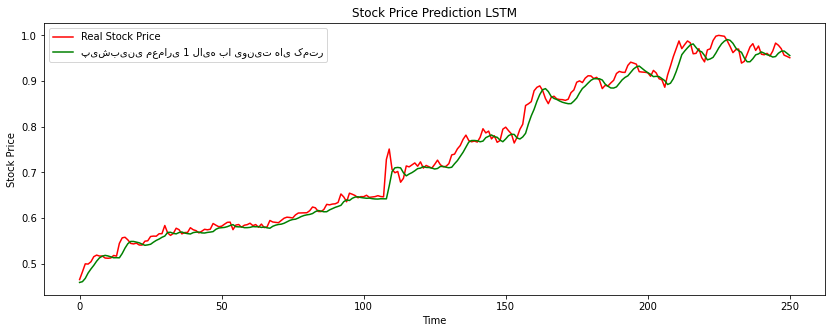

In [63]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred3, color = 'green', label = 'پیشبینی معماری 1 لایه با یونیت های کمتر')
plt.title('Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

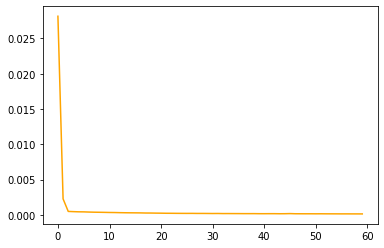

In [64]:
plt.plot(history3.history['loss'], color = 'orange', label = 'پیشبینی 1 لایه با یونیت های کمتر')

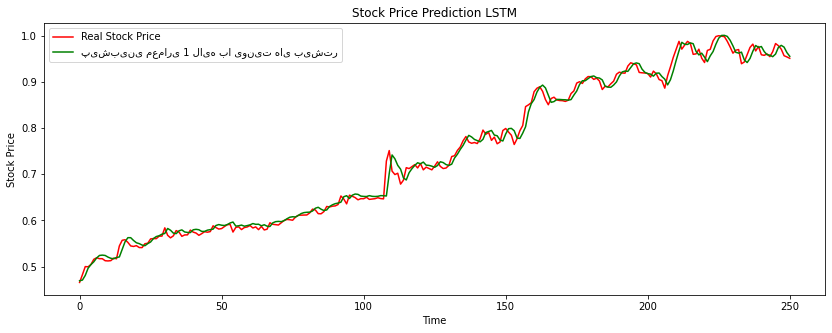

In [65]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred2, color = 'green', label = 'پیشبینی معماری 1 لایه با یونیت های بیشتر')
plt.title('Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

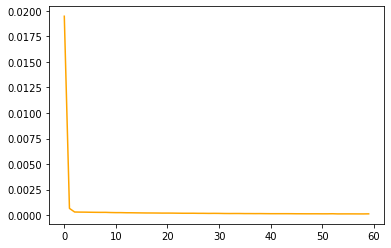

In [66]:
plt.plot(history2.history['loss'], color = 'orange', label = 'پیشبینی یک لایه با یونیت های بیشتر')

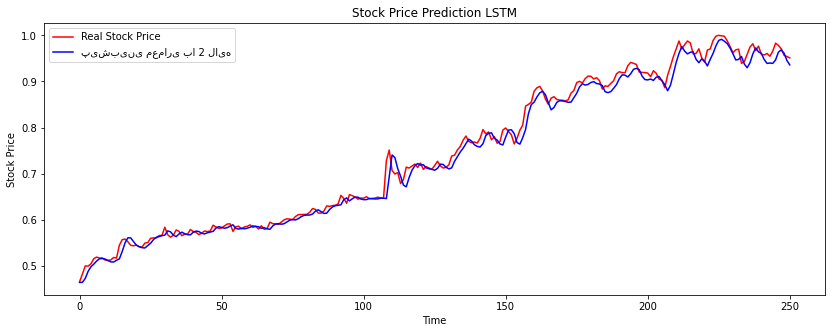

In [67]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred, color = 'blue', label = 'پیشبینی معماری با 2 لایه')

plt.title('Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

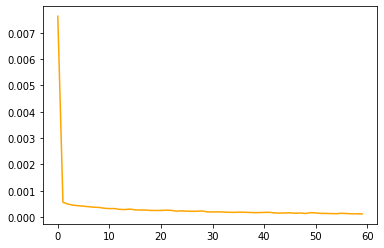

In [68]:
plt.plot(history.history['loss'], color = 'orange', label = 'پیشبینی 2 لایه')

In [69]:
# plt.figure(figsize=(14,5))
# plt.plot(y_test, color = 'red', label = 'Real Stock Price')

# plt.plot(y_pred4, color = 'orange', label = 'پیشبینی یک لایه با یونیت های کمتر')
# plt.title('Stock Price Prediction LSTM')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

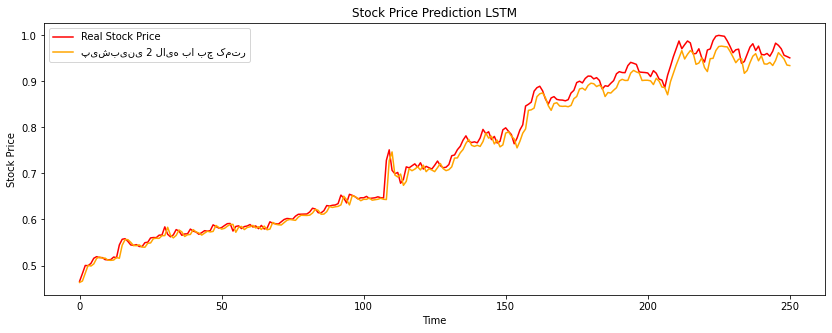

In [70]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')

plt.plot(y_pred5, color = 'orange', label = 'پیشبینی 2 لایه با بچ کمتر')
plt.title('Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

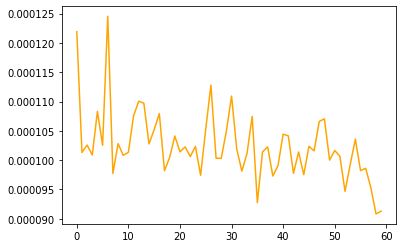

In [74]:
plt.plot(history5.history['loss'], color = 'orange', label = 'پیشبینی 2 لایه با بچ کمتر')

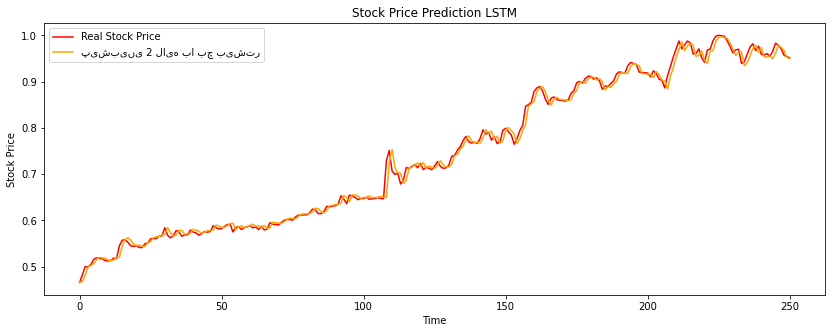

In [72]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')

plt.plot(y_pred6, color = 'orange', label = 'پیشبینی 2 لایه با بچ بیشتر')
plt.title('Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

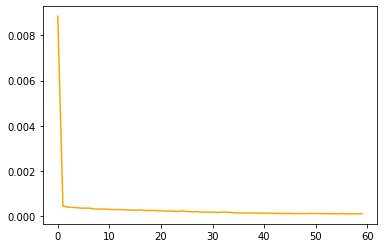

In [73]:
plt.plot(history6.history['loss'], color = 'orange', label = 'پیشبینی 2 لایه با بچ بیشتر')